<a href="https://colab.research.google.com/github/makkimaki/reinforcement-learning-udemy/blob/main/06_MultiArmBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
class MultiArmBandit(object):
    def __init__(self, probs) -> None:
        self.probs = probs
        self.n_arms = len(self.probs)

    def pull(self, arm_index):
        reward = 1 if np.random.rand() < self.probs[arm_index] else 0
        return reward

In [25]:
class EpsilonGreedyAgent(object):
    def __init__(self, bandit, epsilon=0.1, n_steps=1000) -> None:
        """
        Args:
            bandit: MultiArmBanditを受け取る
            epsilon: ランダムにスロットを選ぶ確率
            n_steps: 試行回数
        """
        self.bandit = bandit
        self.epsilon = epsilon
        self.n_steps = n_steps
        self.q_values = np.zeros(self.bandit.n_arms) #あたりの出やすさを更新していくため
        self.action_counts = np.zeros(self.bandit.n_arms) # 全体として何回引いたのか？カウント
        self.reward_history = [] # あたりが出る確率がだんだん上がっていくのを確認するため
        self.n_arms = bandit.n_arms

    def select_action(self):
        if np.random.rand() < self.epsilon:
            # action = np.random.randint(0, self.bandit.n_arms)
            return np.random.randint(self.bandit.n_arms)
        else:
            return np.argmax(self.q_values) # それぞれのマシンのうちどれが当たりそうか（最大値のもの）を選択する

    def update_q_values(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

    def run(self):
        for step in range(self.n_steps):
            action = self.select_action()
            reward = self.bandit.pull(action)
            self.update_q_values(action, reward)
            self.reward_history.append(reward)

    def plot_rewards(self, window=50):
        reward_series = pd.Series(self.reward_history)
        moving_avg = reward_series.rolling(window=window, min_periods=1).mean()

        plt.figure(figsize=(10, 6))
        plt.ylim([0, 1])
        sns.lineplot(x=range(len(moving_avg)), y=moving_avg)
        plt.axhline(y=max(self.bandit.probs), color='r', linestyle='-', label='Optimal Reward')
        plt.title("Reward History")
        plt.xlabel("Step")
        plt.ylabel("Reward")

        plt.legend()
        plt.show()

In [26]:
probs = [0.30, 0.15, 0.20]

bandit = MultiArmBandit(probs)
agent = EpsilonGreedyAgent(bandit, epsilon=0.1, n_steps=2000)
agent.run()

In [27]:
agent.reward_history[:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

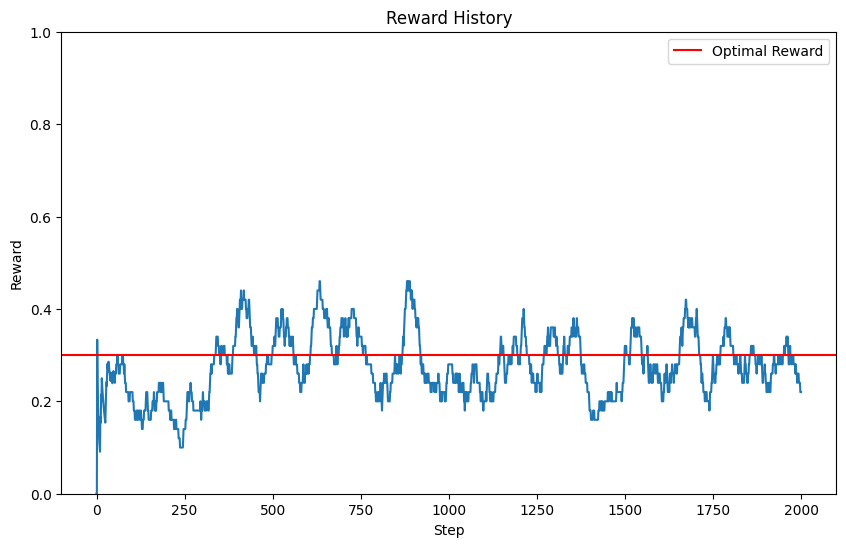

In [28]:
agent.plot_rewards()